# **Importing necesary libaries**

In [1]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7038 sha256=239b05dadae649ac1b4f8e4252794006a35fb97d2df7cf05d0993d6a29b8f835
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [2]:
from flask import Flask, request, jsonify, render_template, redirect
import pickle
import os
import soundfile
import librosa
import numpy as np
import ntpath
import wave
from playsound import playsound
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import classification_report


# **Loading Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install unrar
!unrar x '/content/drive/MyDrive/Datasets/audio_speech_actors_01-24.rar'
!unrar x '/content/drive/MyDrive/Datasets/TESS Toronto emotional speech set data.rar'
!unrar x '/content/drive/MyDrive/Datasets/Audio_Song_Actors_01-24.rar'


Streaming output truncated to the last 5000 lines.
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_hurl_disgust.wav      26%  OK 
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_hush_disgust.wav      26%  OK 
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_jail_disgust.wav      26%  OK 
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_jar_disgust.wav      26%  OK 
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_join_disgust.wav      26%  OK 
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_judge_disgust.wav      26%  OK 
Extracting  TESS Toronto emotional speech set data/TESS Toronto emotional

# **Visualizing the Data**

In [5]:
x, sr = librosa.load('/content/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')


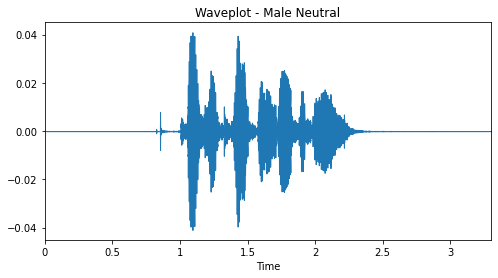

In [6]:
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

In [7]:
actor_folders = '/content/audio_speech_actors_01-24'
for i in os.listdir(actor_folders):
    filename = os.listdir(actor_folders +'/'+ i)
    print(filename)

['03-01-06-01-01-01-07.wav', '03-01-02-01-01-01-07.wav', '03-01-06-02-01-01-07.wav', '03-01-03-02-02-02-07.wav', '03-01-05-02-02-01-07.wav', '03-01-06-01-02-01-07.wav', '03-01-07-02-01-02-07.wav', '03-01-08-01-02-01-07.wav', '03-01-06-02-02-02-07.wav', '03-01-07-02-01-01-07.wav', '03-01-05-02-01-02-07.wav', '03-01-04-01-01-02-07.wav', '03-01-06-01-01-02-07.wav', '03-01-05-01-02-02-07.wav', '03-01-01-01-01-02-07.wav', '03-01-05-01-01-02-07.wav', '03-01-07-01-02-02-07.wav', '03-01-07-02-02-02-07.wav', '03-01-03-01-01-01-07.wav', '03-01-01-01-02-02-07.wav', '03-01-02-02-01-01-07.wav', '03-01-04-02-01-02-07.wav', '03-01-06-02-02-01-07.wav', '03-01-05-01-02-01-07.wav', '03-01-04-02-02-02-07.wav', '03-01-08-01-02-02-07.wav', '03-01-05-01-01-01-07.wav', '03-01-01-01-01-01-07.wav', '03-01-07-01-01-01-07.wav', '03-01-04-01-02-01-07.wav', '03-01-07-02-02-01-07.wav', '03-01-04-02-02-01-07.wav', '03-01-02-01-02-02-07.wav', '03-01-06-02-01-02-07.wav', '03-01-03-02-01-02-07.wav', '03-01-02-01-01-02-

In [8]:
x, sr = librosa.load('/content/Audio_Song_Actors_01-24/Actor_24/03-02-06-02-02-02-24.wav')


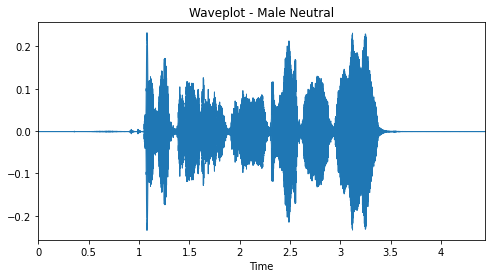

In [9]:
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

In [10]:
actor_folders = '/content/Audio_Song_Actors_01-24'
for i in os.listdir(actor_folders):
    filename = os.listdir(actor_folders +'/'+ i)
    print(filename)

['03-02-05-02-02-01-07.wav', '03-02-04-02-02-02-07.wav', '03-02-02-01-01-01-07.wav', '03-02-02-02-01-01-07.wav', '03-02-02-02-02-01-07.wav', '03-02-05-02-01-01-07.wav', '03-02-03-01-02-01-07.wav', '03-02-01-01-01-01-07.wav', '03-02-04-02-01-02-07.wav', '03-02-06-02-01-01-07.wav', '03-02-04-01-02-01-07.wav', '03-02-03-01-01-01-07.wav', '03-02-02-01-02-01-07.wav', '03-02-04-01-02-02-07.wav', '03-02-04-02-02-01-07.wav', '03-02-06-02-02-02-07.wav', '03-02-03-02-02-01-07.wav', '03-02-05-02-01-02-07.wav', '03-02-02-01-01-02-07.wav', '03-02-05-01-01-02-07.wav', '03-02-05-01-02-02-07.wav', '03-02-04-01-01-02-07.wav', '03-02-01-01-02-01-07.wav', '03-02-06-01-01-02-07.wav', '03-02-03-02-02-02-07.wav', '03-02-05-02-02-02-07.wav', '03-02-03-01-02-02-07.wav', '03-02-06-02-02-01-07.wav', '03-02-04-01-01-01-07.wav', '03-02-05-01-01-01-07.wav', '03-02-06-01-02-01-07.wav', '03-02-02-02-02-02-07.wav', '03-02-06-01-01-01-07.wav', '03-02-03-02-01-01-07.wav', '03-02-06-02-01-02-07.wav', '03-02-01-01-01-02-

# **Using ravdess dataset**

**Extracting Features from audio files**

In [11]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate= librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      mfccs=np.mean(librosa.feature.mfcc (y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      result=np.hstack((result, mfccs))
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft (S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram (X, sr=sample_rate). T, axis=0)
      result=np.hstack((result, mel))
    return result

In [12]:
emotions={'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'}
observed_emotions=[ 'happy', 'sad','surprised','fearful','disgust','angry','neutral','calm'] 
        

In [13]:
def dataset_options():
#choose datasets
  ravdess = True
  tess = False
  ravdess_speech =True
  ravdess_song = False
  data = {'ravdess ':ravdess, 'ravdess_speech' :ravdess_speech, 'ravdess_song': ravdess_song, 'tess':tess}
  print (data)
  return data

In [14]:
import glob
from sklearn.model_selection import train_test_split
def load_data(test_size=0.2):
  x,y=[],[]
  data = dataset_options()
  paths = []
  paths.append("/content/audio_speech_actors_01-24/Actor_*/*.wav")
  paths.append("/content/Audio_Song_Actors_01-24/Actor_*\*.wav")
  for file in glob.glob('/content/audio_speech_actors_01-24/Actor_*/*.wav'):
        file_name = os.path.basename (file)
        emotion=emotions [file_name.split("-")[2]]
        if emotion not in observed_emotions:
          continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True) 
        x.append(feature)
        y.append(emotion)
  for file in glob.glob('/content/Audio_Song_Actors_01-24/Actor_*/*.wav'):
        file_name = os.path.basename (file)
        emotion=emotions [file_name.split("-")[2]]
        if emotion not in observed_emotions:
          continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True) 
        x.append(feature)
        y.append(emotion)
        
  return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.8, random_state=9)

**Dividing Data into Train and Test**

In [15]:
X_train, X_test, y_train, y_test = load_data(test_size=0.2)

{'ravdess ': True, 'ravdess_speech': True, 'ravdess_song': False, 'tess': False}


In [16]:
print((X_train.shape[0] , X_test.shape[0]))

(1961, 491)


 **Data Preprocessing**

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
y_train = np.array(y_train)
label_encoder = LabelEncoder()
std = StandardScaler()

#Label encoding the y_train and y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

print(y_train)

# saving 20% data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.2, random_state= 8)

[0 7 6 ... 4 4 4]


 **Using SVM**


In [18]:
from sklearn.svm import SVC

In [19]:
svc_unscaled = SVC(decision_function_shape='ovo').fit(X_train, y_train)

In [20]:
print('Accuracy : {}'.format(svc_unscaled.score (X_test, y_test)))

Accuracy : 0.2606924643584521


 **Using MLP CLassifier**

In [21]:
# model = MLPClassifier(alpha=0.01, batch_size=256, epsilon='le-08', hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
clf = MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500).fit(X_train, y_train)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5173116089613035

**Traning model CONVO__1D**

In [24]:
model = Sequential()
model.add(Conv1D(16, kernel_size=(3), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Conv1D(128, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Conv1D(256, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 178, 16)           64        
                                                                 
 conv1d_1 (Conv1D)           (None, 176, 64)           3136      
                                                                 
 conv1d_2 (Conv1D)           (None, 174, 128)          24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 87, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 87, 128)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 85, 256)           98560     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=32, epochs=50)

Epoch 1/50
49/49 [==============================] - 12s 26ms/step - loss: 2.4435 - accuracy: 0.1964 - val_loss: 2.1020 - val_accuracy: 0.2799
Epoch 2/50
49/49 [==============================] - 0s 9ms/step - loss: 2.1540 - accuracy: 0.2526 - val_loss: 2.0355 - val_accuracy: 0.2901
Epoch 3/50
49/49 [==============================] - 1s 10ms/step - loss: 2.0673 - accuracy: 0.2628 - val_loss: 1.9932 - val_accuracy: 0.3003
Epoch 4/50
49/49 [==============================] - 0s 8ms/step - loss: 2.0198 - accuracy: 0.2825 - val_loss: 1.9526 - val_accuracy: 0.3461
Epoch 5/50
49/49 [==============================] - 0s 9ms/step - loss: 1.9423 - accuracy: 0.3170 - val_loss: 1.9056 - val_accuracy: 0.3486
Epoch 6/50
49/49 [==============================] - 0s 9ms/step - loss: 1.9049 - accuracy: 0.3297 - val_loss: 1.8583 - val_accuracy: 0.3969
Epoch 7/50
49/49 [==============================] - 1s 11ms/step - loss: 1.8562 - accuracy: 0.3552 - val_loss: 1.8311 - val_accuracy: 0.3995
Epoch 8/50
49/49

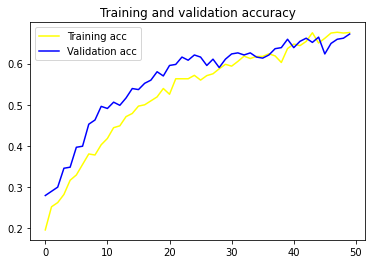

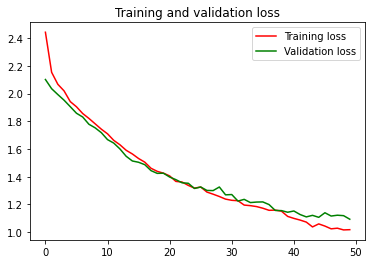

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'b', label='Training acc',color='yellow')
plt.plot(epochs, val_acc, 'b', label='Validation acc',color='blue')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
scores = model.evaluate (X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores [1]*100))


Accuracy: 64.97%


In [28]:
model = Sequential()
model.add(Conv1D(16, kernel_size=(3), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Conv1D(128, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Conv1D(256, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Conv1D(512, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 178, 16)           64        
                                                                 
 conv1d_5 (Conv1D)           (None, 176, 64)           3136      
                                                                 
 conv1d_6 (Conv1D)           (None, 174, 128)          24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 87, 128)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 87, 128)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 85, 256)           98560     
                                                      

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=32, epochs=25)

Epoch 1/25
49/49 [==============================] - 1s 12ms/step - loss: 2.3094 - accuracy: 0.2117 - val_loss: 2.1385 - val_accuracy: 0.2774
Epoch 2/25
49/49 [==============================] - 0s 8ms/step - loss: 2.1531 - accuracy: 0.2366 - val_loss: 2.1024 - val_accuracy: 0.2977
Epoch 3/25
49/49 [==============================] - 0s 7ms/step - loss: 2.0913 - accuracy: 0.2411 - val_loss: 2.0624 - val_accuracy: 0.2824
Epoch 4/25
49/49 [==============================] - 0s 8ms/step - loss: 2.0582 - accuracy: 0.2577 - val_loss: 2.0263 - val_accuracy: 0.2977
Epoch 5/25
49/49 [==============================] - 0s 7ms/step - loss: 2.0055 - accuracy: 0.2889 - val_loss: 1.9934 - val_accuracy: 0.2952
Epoch 6/25
49/49 [==============================] - 0s 7ms/step - loss: 1.9962 - accuracy: 0.2946 - val_loss: 1.9769 - val_accuracy: 0.3079
Epoch 7/25
49/49 [==============================] - 0s 7ms/step - loss: 1.9584 - accuracy: 0.3029 - val_loss: 1.9562 - val_accuracy: 0.3817
Epoch 8/25
49/49 [=

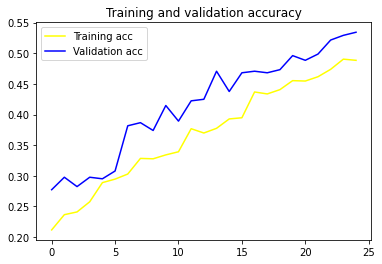

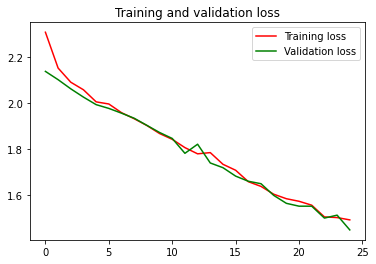

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'b', label='Training acc',color='yellow')
plt.plot(epochs, val_acc, 'b', label='Validation acc',color='blue')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
scores = model.evaluate (X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores [1]*100))


Accuracy: 51.93%


# **Using ravdess and tess dataset combine**

**Extracting Features from audio files**

In [32]:
def dataset_options():
#choose datasets
  ravdess = True
  tess = True
  ravdess_speech =True
  ravdess_song = False
  data = {'ravdess ':ravdess, 'ravdess_speech' :ravdess_speech, 'ravdess_song': ravdess_song, 'tess':tess}
  print (data)
  return data

In [33]:
import glob
from sklearn.model_selection import train_test_split
def load_data(test_size=0.2):
  x,y=[],[]
  data = dataset_options()
  paths = []
  for file in glob.glob('/content/audio_speech_actors_01-24/Actor_*/*.wav'):
        file_name = os.path.basename (file)
        emotion=emotions [file_name.split("-")[2]]
        if emotion not in observed_emotions:
          continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True) 
        x.append(feature)
        y.append(emotion)

  for file in glob.glob('/content/Audio_Song_Actors_01-24/Actor_*/*.wav'):
        file_name = os.path.basename (file)
        emotion=emotions [file_name.split("-")[2]]
        if emotion not in observed_emotions:
          continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True) 
        x.append(feature)
        y.append(emotion)  

  for file in glob.glob('/content/TESS Toronto emotional speech set data/*AF_*/*.wav'):
          file_name=os.path.basename (file)
          emotion=file_name.split("_") [2] [:-4] #split and remove .wav
          if emotion == 'ps':
              emotion = 'surprised'
          if emotion not in observed_emotions:
              continue
          feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
          x.append(feature)
          y.append(emotion) 

  return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75, random_state=9)

**Dividing Data into Train and Test**

In [34]:
X_train, X_test, y_train, y_test = load_data(test_size=0.2)

{'ravdess ': True, 'ravdess_speech': True, 'ravdess_song': False, 'tess': True}


In [35]:
print((X_train.shape[0] , X_test.shape[0]))

(3639, 971)


 **Data Preprocessing**

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
y_train = np.array(y_train)
label_encoder = LabelEncoder()
std = StandardScaler()

#Label encoding the y_train and y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

print(y_train)

# saving 20% data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.2, random_state= 8)

[0 4 7 ... 1 4 6]


 **Using SVM**


In [37]:
from sklearn.svm import SVC

In [38]:
svc_unscaled = SVC(decision_function_shape='ovo').fit(X_train, y_train)

In [39]:
print('Accuracy : {}'.format(svc_unscaled.score (X_test, y_test)))

Accuracy : 0.49948506694129763


 **Using MLP CLassifier**

In [40]:
# model = MLPClassifier(alpha=0.01, batch_size=256, epsilon='le-08', hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
clf = MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500).fit(X_train, y_train)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8218331616889805

**Traning model CONVO__1D**

In [51]:
model = Sequential()
model.add(Conv1D(16, kernel_size=(3), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Conv1D(128, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Conv1D(256, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 178, 16)           64        
                                                                 
 conv1d_19 (Conv1D)          (None, 176, 64)           3136      
                                                                 
 conv1d_20 (Conv1D)          (None, 174, 128)          24704     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 87, 128)          0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 87, 128)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 85, 256)           98560     
                                                      

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=32, epochs=50)

Epoch 1/50
91/91 [==============================] - 2s 9ms/step - loss: 2.0317 - accuracy: 0.3315 - val_loss: 1.6707 - val_accuracy: 0.5179
Epoch 2/50
91/91 [==============================] - 1s 6ms/step - loss: 1.6127 - accuracy: 0.4792 - val_loss: 1.4198 - val_accuracy: 0.5440
Epoch 3/50
91/91 [==============================] - 1s 6ms/step - loss: 1.4368 - accuracy: 0.5531 - val_loss: 1.2989 - val_accuracy: 0.6030
Epoch 4/50
91/91 [==============================] - 1s 6ms/step - loss: 1.3222 - accuracy: 0.5833 - val_loss: 1.2155 - val_accuracy: 0.6470
Epoch 5/50
91/91 [==============================] - 1s 8ms/step - loss: 1.2300 - accuracy: 0.6170 - val_loss: 1.1377 - val_accuracy: 0.6717
Epoch 6/50
91/91 [==============================] - 1s 7ms/step - loss: 1.1689 - accuracy: 0.6417 - val_loss: 1.1092 - val_accuracy: 0.6635
Epoch 7/50
91/91 [==============================] - 1s 9ms/step - loss: 1.1423 - accuracy: 0.6396 - val_loss: 1.0581 - val_accuracy: 0.6882
Epoch 8/50
91/91 [==

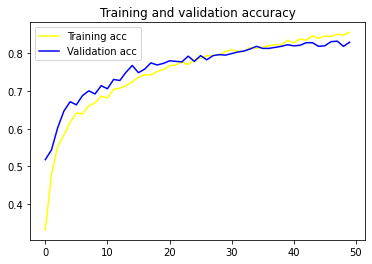

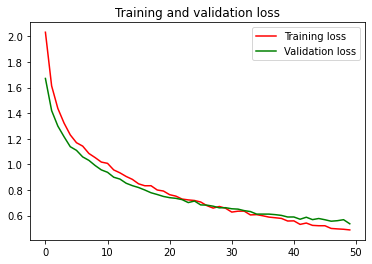

In [53]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'b', label='Training acc',color='yellow')
plt.plot(epochs, val_acc, 'b', label='Validation acc',color='blue')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
scores = model.evaluate (X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores [1]*100))


Accuracy: 84.45%


In [59]:
import pickle 
pickle.dump(model,open('/content/drive/MyDrive/ML_SEM_PROJECT/SER_model.sav','wb'))

In [47]:
model = Sequential()
model.add(Conv1D(16, kernel_size=(3), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Conv1D(128, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Conv1D(256, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Conv1D(512, kernel_size=(3),activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 178, 16)           64        
                                                                 
 conv1d_14 (Conv1D)          (None, 176, 64)           3136      
                                                                 
 conv1d_15 (Conv1D)          (None, 174, 128)          24704     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 87, 128)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 87, 128)           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 85, 256)           98560     
                                                      

In [48]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=32, epochs=70)

Epoch 1/70
91/91 [==============================] - 2s 14ms/step - loss: 2.0656 - accuracy: 0.3088 - val_loss: 1.8381 - val_accuracy: 0.4451
Epoch 2/70
91/91 [==============================] - 1s 10ms/step - loss: 1.7680 - accuracy: 0.4208 - val_loss: 1.6433 - val_accuracy: 0.5110
Epoch 3/70
91/91 [==============================] - 1s 10ms/step - loss: 1.6227 - accuracy: 0.4607 - val_loss: 1.5230 - val_accuracy: 0.5481
Epoch 4/70
91/91 [==============================] - 1s 7ms/step - loss: 1.4947 - accuracy: 0.5215 - val_loss: 1.3940 - val_accuracy: 0.5755
Epoch 5/70
91/91 [==============================] - 1s 7ms/step - loss: 1.3992 - accuracy: 0.5541 - val_loss: 1.3044 - val_accuracy: 0.6058
Epoch 6/70
91/91 [==============================] - 1s 7ms/step - loss: 1.3334 - accuracy: 0.5761 - val_loss: 1.2436 - val_accuracy: 0.6374
Epoch 7/70
91/91 [==============================] - 1s 8ms/step - loss: 1.2704 - accuracy: 0.6043 - val_loss: 1.1798 - val_accuracy: 0.6429
Epoch 8/70
91/91 

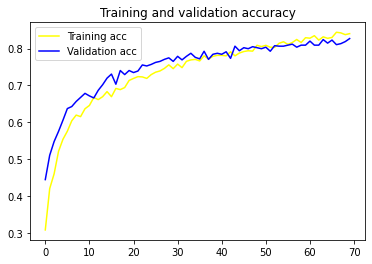

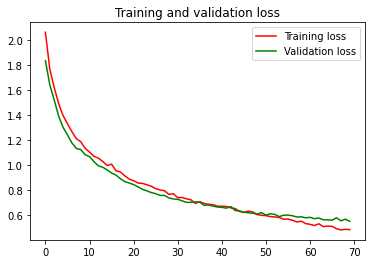

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'b', label='Training acc',color='yellow')
plt.plot(epochs, val_acc, 'b', label='Validation acc',color='blue')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='green')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
scores = model.evaluate (X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores [1]*100))

Accuracy: 82.60%
